<a href="https://colab.research.google.com/github/mz-zarei/MNIST_Classification/blob/main/CNN(Part1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############ Part 1 and 2: Training CNN with different epoch numbers ####################
#########################################################################################
batch_size = 128


import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()




############# Loaading Data
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.16666666, random_state = 42)

print('train dataset: ', X_train.shape, y_train.shape,X_train[0].shape, y_train)
print('test dataset: ', X_test.shape, y_test.shape,)
print('Validation dataset: ',X_val.shape, y_val.shape,)




############# function for resizing images default 32*32

def resize_image (X, new_size = (32,32)):
    X_resized = []
    for i in range(len(X)):
        
        im = Image.fromarray(X[i])
        im = im.resize(new_size)
        
        X_resized.append(np.asarray(im))
        
    X_resized = np.array(X_resized)
    return (X_resized)



############## Resizing and normalizing
W = 32
H = 32
X_train_resized = resize_image(X_train, new_size = (W,H)) /255
X_test_resized = resize_image(X_test, new_size = (W,H)) /255
X_val_resized = resize_image(X_val, new_size = (W,H)) /255

print(X_train_resized.shape)




############## one-hot-encoding of y labels

nb_classes = 10    # 10 labels 

#y_train_encoded = np.eye(nb_classes)[y_train]
#y_test_encoded = np.eye(nb_classes)[y_test]

y_train_encoded = to_categorical(y_train, nb_classes)
y_test_encoded = to_categorical(y_test, nb_classes)
y_val_encoded = to_categorical(y_val, nb_classes)

print('one hot encoding done, example: ',y_train[0], y_train_encoded[0])








############# Reshaping inputs 


X_train_resized_reshaped = X_train_resized.reshape(50000,W,H,1)
X_test_resized_reshaped = X_test_resized.reshape(10000,W,H,1)
X_val_resized_reshaped = X_val_resized.reshape(10000,W,H,1)

print('resizing done! new size of each image: ',X_train_resized.shape)
print('reshaping done! new shape of train set', X_train_resized_reshaped.shape)








################ Creating VGG11 CNN ###########################################
def creat_vgg11(nb_classes = 10, W=32, H=32):
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, padding='same', activation ='relu', input_shape=(W,H,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(nb_classes, activation='softmax'))

  return (model)


###############   Train and evaluate the model
X = X_train_resized_reshaped 
X_t = X_test_resized_reshaped 
X_v = X_val_resized_reshaped 

y = y_train_encoded
y_t = y_test_encoded
y_v = y_val_encoded

epoch_list = [3,4,5,7,10,13,16]
history_list = {}

test_loss_list = []
test_acc_list = []
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []


for i in epoch_list:
  keras.backend.clear_session()
  CNN = creat_vgg11()
  CNN.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam', #keras.optimizers.Adadelta(),
                  metrics = ['accuracy'])

  history = CNN.fit(X, y, batch_size = batch_size, epochs = i,
              verbose = 1, validation_data=(X_v, y_v))
  history_list[i] = history
  
  train_acc_list.append(history.history['acc'][i-1])     #adding value of last epoch in each total epoch number
  train_loss_list.append(history.history['loss'][i-1]) 
  val_acc_list.append(history.history['val_acc'][i-1]) 
  val_loss_list.append(history.history['val_loss'][i-1]) 



  score = CNN.evaluate(X_t, y_t, verbose=0)
  print('Test loss:', score[0])
  test_loss_list.append(score[0])

  print('Test accuracy:', score[1])
  test_acc_list.append(score[1])


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term
11493376/11490434 [==============================] - 1s 0us/step
train dataset:  (50000, 28, 28) (50000,) (28, 28) [8 5 1 ... 0 0 4]
test dataset:  (10000, 28, 28) (10000,)
Validation dataset:  (10000, 28, 28) (10000,)
(50000, 32, 32)
one hot encoding done, example:  8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
resizing done! new size of each image:  (50000, 32, 32)
reshaping done! new shape of train set (50000, 32, 32, 1)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/3





50000/50000 [==============================] - 20s 408us/step - loss: 0.3450 - acc: 0.8792 - val_loss: 0.0864 - val_acc: 0.9749
Epoch 2/3
50000/50000 [==============================] - 12s 242us/step - loss: 0.0655 - acc: 0.9802 - val_loss: 0.0723 - val_acc: 0.9799
Epoch 3/3
50000/50000 [==============================] - 12s 24

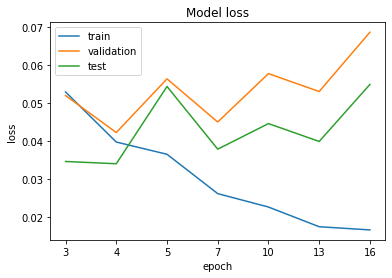

In [ ]:
# "Loss" vs epoch number
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.plot(test_loss_list)



plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(len(epoch_list)), epoch_list)
plt.legend(['train', 'validation', 'test'], loc='upper left')
plt.show()

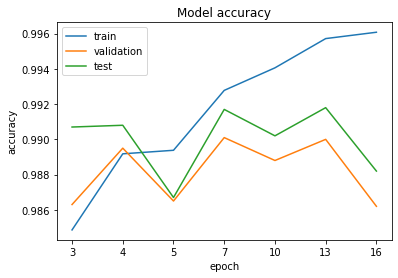

In [ ]:
#  "Accuracy" vs epoch number
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.plot(test_acc_list)

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(len(epoch_list)), epoch_list)
plt.legend(['train', 'validation', 'test'], loc='upper left')



plt.show()
